<a href="https://colab.research.google.com/github/prativa121/music_genre-classification/blob/main/audio_classification_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/mydrive/')

Mounted at /content/mydrive/


In [ ]:
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  import os
  import pickle
  import librosa
  import librosa.display
  from IPython.display import Audio
  import tensorflow as tf
  from tensorflow import keras

In [ ]:
audio_dir = '/content/mydrive/MyDrive/Colab Notebooks/data/audio classification/Data/genres_original'
audio_data = '/content/mydrive/MyDrive/Colab Notebooks/data/audio classification/Data/genres_original/blues/blues.00000.wav'
data , sr = librosa.load(audio_data)
print(type(data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [ ]:
librosa.load(audio_data, sr=45600)


(array([ 0.00735559,  0.01318345,  0.01651267, ..., -0.07302444,
        -0.06128362, -0.03038189], dtype=float32), 45600)

In [ ]:
import IPython
IPython.display.Audio(data, rate=sr)

In [ ]:
pip install pydub


In [ ]:
from pydub import AudioSegment

In [ ]:
for i,j in enumerate(os.listdir(audio_dir)):
  if i<5:
    genre_path = os.path.join(audio_dir,j)
    os.chdir(genre_path)
    print(os.getcwd())
    for song in os.listdir(genre_path):
      segment = 0
      song_name = song.split('.wav')[0]
      print(song_name)
      for i in range(0,30,3):
        t1 = i * 1000 #Works in milliseconds
        t2 = (i+3) * 1000
        newAudio = AudioSegment.from_wav(song)
        newAudio = newAudio[t1:t2]
        newAudio.export(f'/content/mydrive/MyDrive/Colab Notebooks/data/audio classification/Data/new_audio/{song_name}{segment}.wav', format="wav") #Exports to a wav file in the current path.
        segment += 1    

In [ ]:
for i in range(0,30,3):
  t1 = i * 1000 #Works in milliseconds
  t2 = (i+3) * 1000
  newAudio = AudioSegment.from_wav(audio_data)
  newAudio = newAudio[t1:t2]
  newAudio.export(f'newSong{i}.wav', format="wav") #Exports to a wav file in the current path.

In [ ]:
# https://www.kaggle.com/sneharupmukherjee/gtzan-music-genre-classification - kaggle notebook
# https://stackoverflow.com/questions/37999150/how-to-split-a-wav-file-into-multiple-wav-files - wav file splitting

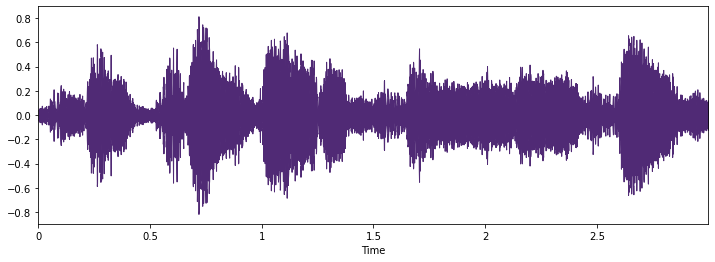

In [ ]:
data , sr = librosa.load('newSong0.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, color = "#502A75")
plt.show()

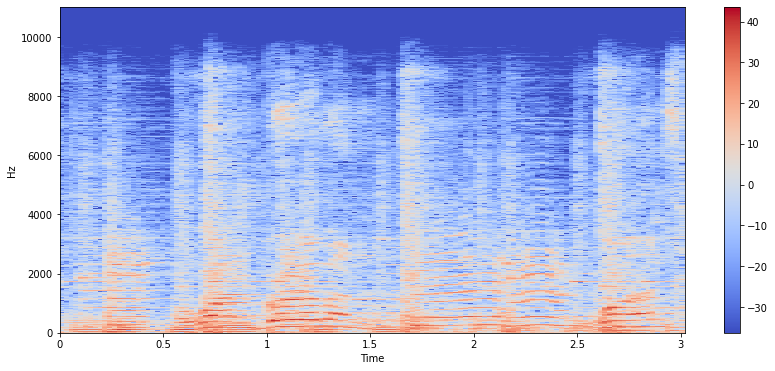

In [ ]:
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 6))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

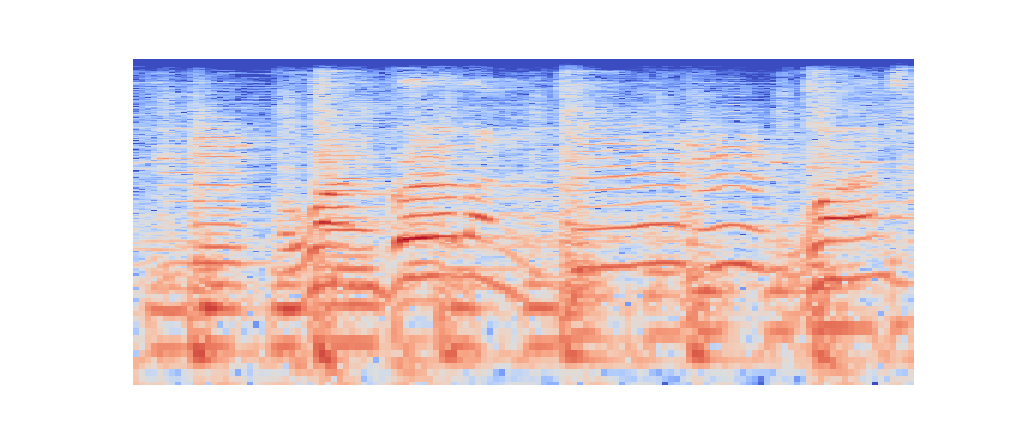

In [ ]:
plt.figure(figsize=(14, 6))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
# plt.colorbar()
plt.axis('off')
plt.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
plt.savefig("save.png", bbox_inches=None, pad_inches=0)

In [ ]:
new_dir = '/content/mydrive/MyDrive/Colab Notebooks/data/audio classification/Data/new_audio'
for song in os.listdir(new_dir):
  print(song.split('.')[0])
  if song.split('.')[0] == "blues":
    song_name = song.split('.wav')[0]
    data , sr = librosa.load(os.path.join(new_dir,song))
    mel_spect = librosa.feature.melspectrogram(y=data, sr=sr, n_fft=2048, hop_length=1024)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    plt.figure(figsize=(14, 6))             # this size may affect the size of the image we get saved
    plt.axis('off')
    librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time')
    plt.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
    plt.savefig(f"/content/mydrive/MyDrive/Colab Notebooks/data/audio classification/Data/new_image/{song_name}.png", bbox_inches=None, pad_inches=0)
    plt.close('all')
    # plt.title('Mel Spectrogram');
    # plt.colorbar(format='%+2.0f dB');

In [ ]:
import cv2

In [ ]:
img = cv2.imread('/content/mydrive/MyDrive/Colab Notebooks/data/audio classification/Data/new_image/blues.000000.png')

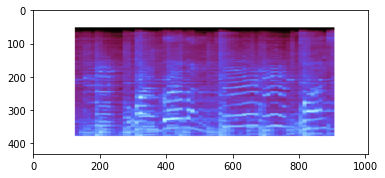

In [ ]:
# plt.axis('off')
plt.imshow(img) 
# image still has white borders

In [ ]:
height, width, channels = img.shape
print(height,"X",width,"X",channels)
# this size is recieved because of the size we are giving for the figure when saving the figure from matplotlib plot

432 X 1008 X 3


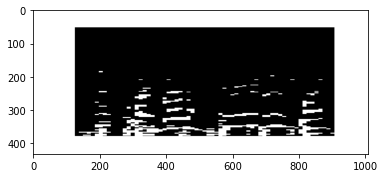

In [ ]:
#converting image to gray to apply contour to get only image without the white borders
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_grey, cmap='gray')
ret3,thresh = cv2.threshold(img_grey,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')
(components, _) = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

240891.5
125 51 783 328
(328, 783)


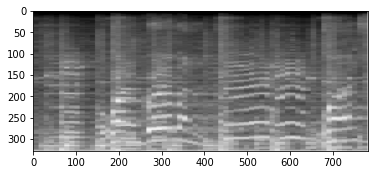

In [ ]:
# getting contours
for c in components:
  if cv2.contourArea(c) > 200000 and cv2.contourArea(c) < 400000: #got the value from checking contour area of image by hit and trial 
    print(cv2.contourArea(c))
    (x, y, w, h) = cv2.boundingRect(c)
    print(x,y,w,h)
new_img = img_grey[y:y+h,x:x+w]
# plt.axis('off')
plt.imshow(new_img, cmap='gray')
print(new_img.shape)

In [ ]:
img_h =  320
img_w = 780
# to make every image of same size to input to model
resize_img = cv2.resize(new_img, (img_w,img_h))
plt.imshow(resize_img,cmap='gray')
print(resize_img.shape)

In [ ]:
# for all images 
image_data = []
# specifying image height and width so that all images are same size to be given to ML model
img_h =  320
img_w = 780

In [ ]:

#image directory
img_dir = '/content/mydrive/MyDrive/Colab Notebooks/data/audio classification/Data/new_image'

for image in os.listdir(img_dir):
  # read image as grayscale to save memory and save model complexity by giving only one color channel
  img = cv2.imread(os.path.join(img_dir,image), cv2.IMREAD_GRAYSCALE)
  # applying threshold
  ret3,thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  # taking out contours to get actual image without white border
  components, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
  for c in components:
    print('for loop')
    if cv2.contourArea(c) > 200000 and cv2.contourArea(c) < 400000: #got the value from checking contour area of image by hit and trial 
      print(cv2.contourArea(c))
      (x, y, w, h) = cv2.boundingRect(c)
      print("Original image bounding:",x,y,w,h)
  # cropping required image
  cropped_img = img[y:y+h,x:x+w]
  resize_img = cv2.resize(cropped_img, (img_w,img_h))
  image_data.append((image,image.split('.')[0],resize_img))

In [ ]:
image_data[0]

('blues.000002.png', 'blues', array([[255, 252, 252, ..., 252, 252, 255],
        [254,  20,  20, ...,   0,   0, 254],
        [254,  20,  20, ...,   0,   0, 254],
        ...,
        [255, 205, 205, ..., 148, 148, 255],
        [255, 185, 185, ..., 139, 139, 255],
        [255, 254, 254, ..., 254, 254, 255]], dtype=uint8))

(320, 780)


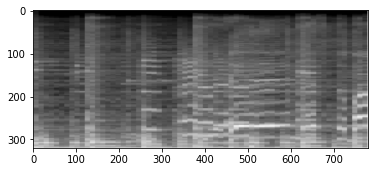

In [ ]:
plt.imshow(image_data[0][2], cmap='gray')
print(image_data[0][2].shape)

In [ ]:
import pandas

In [ ]:

df = pd.DataFrame(image_data, columns=['image_name','label','img_array'])

In [ ]:
df

,image_name,label,img_array
0,blues.000002.png,blues,"[[255, 252, 252, 252, 252, 252, 252, 252, 252,..."
1,blues.000003.png,blues,"[[255, 252, 252, 252, 252, 252, 252, 252, 252,..."
2,blues.000004.png,blues,"[[255, 252, 252, 252, 252, 252, 252, 252, 252,..."
3,blues.000005.png,blues,"[[255, 252, 252, 252, 252, 252, 252, 252, 252,..."
4,blues.000006.png,blues,"[[255, 252, 252, 252, 252, 252, 252, 252, 252,..."
...,...,...,...
4995,reggae.000927.png,reggae,"[[255, 252, 252, 252, 252, 252, 252, 252, 252,..."
4996,reggae.000928.png,reggae,"[[255, 252, 252, 252, 252, 252, 252, 252, 252,..."
4997,reggae.000929.png,reggae,"[[255, 252, 252, 252, 252, 252, 252, 252, 252,..."
4998,reggae.000000.png,reggae,"[[255, 252, 252, 252, 252, 252, 252, 252, 252,..."


In [ ]:
import pickle

In [ ]:

with open('/content/mydrive/MyDrive/Colab Notebooks/data/audio classification/Data/audio_df', 'wb') as f:
  pickle.dump(df,f)

In [ ]:
with open('/content/mydrive/MyDrive/Colab Notebooks/data/audio classification/Data/audio_df', 'rb') as f:
  data = pickle.load(f)

In [ ]:
data = data.sample(frac=1).reset_index(drop=True)
data

,image_name,label,img_array
0,blues.000566.png,blues,"[[255, 252, 252, 252, 252, 252, 252, 252, 252,..."
1,rock.000596.png,rock,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
2,rock.000716.png,rock,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
3,metal.000285.png,metal,"[[255, 252, 252, 252, 252, 252, 252, 252, 252,..."
4,reggae.000085.png,reggae,"[[255, 252, 252, 252, 252, 252, 252, 252, 252,..."
...,...,...,...
4995,reggae.000812.png,reggae,"[[255, 253, 253, 253, 253, 253, 253, 253, 253,..."
4996,classical.000972.png,classical,"[[255, 252, 252, 252, 252, 252, 252, 252, 252,..."
4997,blues.000668.png,blues,"[[255, 252, 252, 252, 252, 252, 252, 252, 252,..."
4998,metal.000251.png,metal,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."


In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [ ]:
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label']) 
# label will be converted to their number equivalent .... can create a new column if we want 

In [ ]:
print('classes:', label_encoder.classes_)
output_classes = label_encoder.classes_
total_output_classes = len(label_encoder.classes_)
print("length of output classes: ",total_output_classes,'\n','all classes: ',output_classes)

classes: ['blues' 'classical' 'metal' 'reggae' 'rock']
length of output classes:  5 
 all classes:  ['blues' 'classical' 'metal' 'reggae' 'rock']


In [ ]:
# save the output classes that will be used at the time of prediction

with open('/content/mydrive/MyDrive/Colab Notebooks/data/audio classification/Data/output_classes', 'wb') as f:
  pickle.dump(output_classes,f)

In [ ]:
with open('/content/mydrive/MyDrive/Colab Notebooks/data/audio classification/Data/output_classes', 'rb') as f:
  output_classes = pickle.load(f)

In [ ]:
onehot = OneHotEncoder()
labels = onehot.fit_transform(data.label.values.reshape(-1,1)).toarray()
# reshaping as we single feature and converting to array to input it to model

In [ ]:
labels[:2]

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [ ]:
data

,image_name,label,img_array
0,blues.000566.png,0,"[[255, 252, 252, 252, 252, 252, 252, 252, 252,..."
1,rock.000596.png,4,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
2,rock.000716.png,4,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
3,metal.000285.png,2,"[[255, 252, 252, 252, 252, 252, 252, 252, 252,..."
4,reggae.000085.png,3,"[[255, 252, 252, 252, 252, 252, 252, 252, 252,..."
...,...,...,...
4995,reggae.000812.png,3,"[[255, 253, 253, 253, 253, 253, 253, 253, 253,..."
4996,classical.000972.png,1,"[[255, 252, 252, 252, 252, 252, 252, 252, 252,..."
4997,blues.000668.png,0,"[[255, 252, 252, 252, 252, 252, 252, 252, 252,..."
4998,metal.000251.png,2,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."


In [ ]:
img_array = []
for img in data['img_array']:
  img = img.astype('float32')
  img = img/255.0
  img = img.reshape(img_w,img_h,1)
  img_array.append(img)
img_array = np.array(img_array)
print(img_array.shape)

(5000, 780, 320, 1)


In [ ]:
with open('/content/mydrive/MyDrive/Colab Notebooks/data/audio classification/Data/img_training_input_array', 'wb') as f:
  pickle.dump(img_array,f)

with open('/content/mydrive/MyDrive/Colab Notebooks/data/audio classification/Data/labels_training_input', 'wb') as f:
  pickle.dump(labels,f)


OverflowError: ignored

In [ ]:
img_array[1]

array([[[1.        ],
        [0.99607843],
        [0.99607843],
        ...,
        [0.99215686],
        [0.99215686],
        [0.99215686]],

       [[0.99215686],
        [0.99215686],
        [0.99215686],
        ...,
        [0.99215686],
        [0.99215686],
        [0.99215686]],

       [[0.99215686],
        [0.99215686],
        [0.99215686],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       ...,

       [[0.79607844],
        [0.79607844],
        [0.79607844],
        ...,
        [0.8392157 ],
        [0.8392157 ],
        [0.8392157 ]],

       [[0.8392157 ],
        [0.8392157 ],
        [0.8392157 ],
        ...,
        [0.8627451 ],
        [0.8627451 ],
        [0.8627451 ]],

       [[0.8627451 ],
        [0.8627451 ],
        [0.8627451 ],
        ...,
        [0.9254902 ],
        [0.9254902 ],
        [1.        ]]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(img_array, labels, test_size=0.25, random_state=4)

In [ ]:
with open('/content/mydrive/MyDrive/Colab Notebooks/data/audio classification/Data/X_train', 'wb') as f:
  pickle.dump(X_train,f)
with open('/content/mydrive/MyDrive/Colab Notebooks/data/audio classification/Data/y_train', 'wb') as f:
  pickle.dump(y_train,f)
with open('/content/mydrive/MyDrive/Colab Notebooks/data/audio classification/Data/X_test', 'wb') as f:
  pickle.dump(X_test,f)
with open('/content/mydrive/MyDrive/Colab Notebooks/data/audio classification/Data/y_test', 'wb') as f:
  pickle.dump(y_test,f)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# to normalize the image array

In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255.0)
train_iterator = datagen.flow(X_train,y_train, batch_size=12)
test_iterator = datagen.flow(X_test, y_test, batch_size=12)
print(f'batches train={len(train_iterator)}, test={len(test_iterator)}')
batchX, batchy = train_iterator.next()
print(f'Batch shape={batchX.shape}, min={batchX.min()}, max={batchX.max()}')

batches train=313, test=105
Batch shape=(12, 780, 320, 1), min=0.0, max=1.0


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [ ]:
i = Input(shape=(img_w,img_h,1))
x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.2)(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.2)(x)

x = GlobalMaxPooling2D()(x)

x = Flatten()(x)

x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
# x = Dense(total_output_classes, activation='softmax')(x)
x = Dense(5, activation='softmax')(x)

In [ ]:
model = Model(i,x)

In [ ]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
r = model.fit(img_array,labels,batch_size=24, validation_split=0.25, epochs=100)
# r = model.fit(X_train,y_train,labels,batch_size=8, validation_data=(X_test, y_test), epochs=10)

Epoch 1/100
157/157 [==============================] - 86s 491ms/step - loss: 3.4842 - accuracy: 0.2218 - val_loss: 1.6491 - val_accuracy: 0.1832
Epoch 2/100
157/157 [==============================] - 77s 493ms/step - loss: 1.4840 - accuracy: 0.3682 - val_loss: 1.6909 - val_accuracy: 0.2344
Epoch 3/100
157/157 [==============================] - 78s 500ms/step - loss: 1.3457 - accuracy: 0.4491 - val_loss: 1.4660 - val_accuracy: 0.3304
Epoch 4/100
157/157 [==============================] - 79s 505ms/step - loss: 1.2879 - accuracy: 0.4617 - val_loss: 1.3368 - val_accuracy: 0.3960
Epoch 5/100
157/157 [==============================] - 80s 508ms/step - loss: 1.1859 - accuracy: 0.5105 - val_loss: 1.3884 - val_accuracy: 0.3696
Epoch 6/100
157/157 [==============================] - 80s 509ms/step - loss: 1.1095 - accuracy: 0.5385 - val_loss: 1.0917 - val_accuracy: 0.5848
Epoch 7/100
157/157 [==============================] - 80s 510ms/step - loss: 1.0916 - accuracy: 0.5281 - val_loss: 1.1940 -

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau, ModelCheckpoint
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('/content/mydrive/MyDrive/Colab Notebooks/data/audio classification/Data/audio.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='min')


In [ ]:
r = model.fit(train_iterator, steps_per_epoch=len(train_iterator),validation_data=test_iterator, epochs=100, callbacks=[earlyStopping, mcp_save, reduce_lr_loss])

In [ ]:
model.save('/content/mydrive/MyDrive/Colab Notebooks/data/audio classification/Data/audio_model_4.h5')

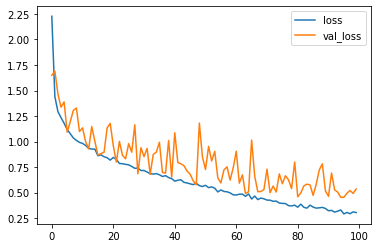

In [ ]:
# plotting the loss and validation loss of the model
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.savefig("/content/mydrive/MyDrive/Colab Notebooks/data/audio classification/Data/model_4_loss.png")

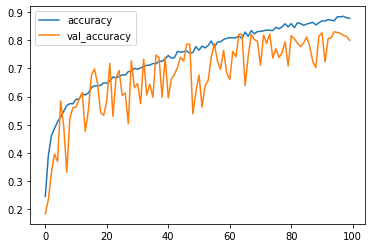

In [ ]:
# plotting the accuracy and validation accuracy of the model
plt.plot(r.history['accuracy'], label= 'accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.savefig("/content/mydrive/MyDrive/Colab Notebooks/data/audio classification/Data/model_4_accuracy.png")

In [ ]:
g drive folder location: https://drive.google.com/drive/folders/141jvM63ZjQu-I98U2x5SxH6Qg_LAqAah 

In [ ]:
pred_model1 = model.load_weights('/content/mydrive/MyDrive/Colab Notebooks/data/audio classification/Data/audio.mdl_wts.hdf5')
pred_model2 = keras.models.load_model('/content/mydrive/MyDrive/Colab Notebooks/data/audio classification/Data/audio_model_1.h5')

In [ ]:
audio_pred = '/content/mydrive/MyDrive/Colab Notebooks/data/audio classification/Data/new_audio/reggae.000998.wav'
data , sr = librosa.load(audio_pred)
import IPython
IPython.display.Audio(data, rate=sr)

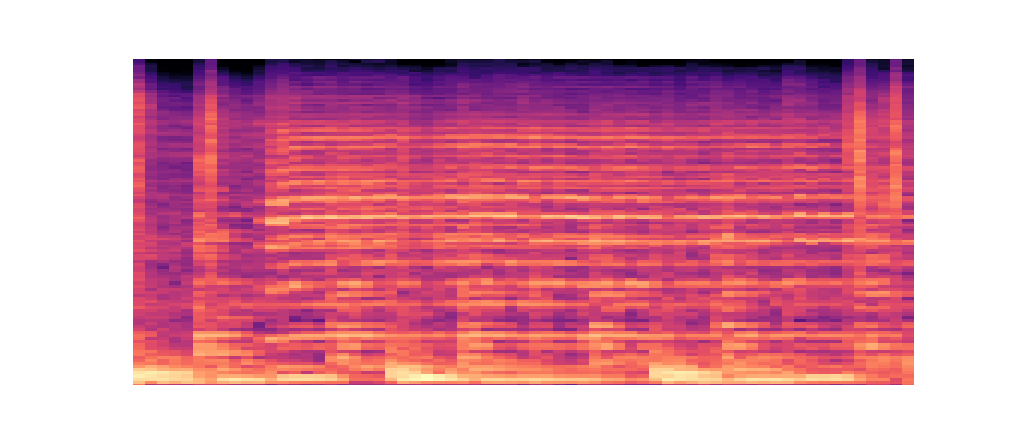

In [ ]:
# data , sr = librosa.load('/content/mydrive/MyDrive/Colab Notebooks/data/audio classification/Data/new_audio/blues.000994.wav')
mel_spect = librosa.feature.melspectrogram(y=data, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
plt.figure(figsize=(14, 6))             # this size may affect the size of the image we get saved
plt.axis('off')
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time')
# plt.colorbar(format='%+2.0f dB')
plt.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
plt.savefig("new_song.png", bbox_inches=None, pad_inches=0)
# plt.close('all')
# plt.title('Mel Spectrogram');


In [ ]:
img = cv2.imread('new_song.png', cv2.IMREAD_GRAYSCALE)
img_h =  320
img_w = 780


In [ ]:
ret3,thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# taking out contours to get actual image without white border
components, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
for c in components:
  if cv2.contourArea(c) > 200000 and cv2.contourArea(c) < 400000: #got the value from checking contour area of image by hit and trial 
    print(cv2.contourArea(c))
    (x, y, w, h) = cv2.boundingRect(c)
    print("Original image bounding:",x,y,w,h)
# cropping required image
cropped_img = img[y:y+h,x:x+w]
resize_img = cv2.resize(cropped_img, (img_w,img_h))

253931.5
Original image bounding: 125 51 783 328


[[255 252 252 ... 252 252 255]
 [255  44  44 ...   9   9 254]
 [254  41  41 ...  19  19 254]
 ...
 [255 204 204 ... 151 151 255]
 [255 158 158 ... 143 143 255]
 [255 254 254 ... 254 254 255]]


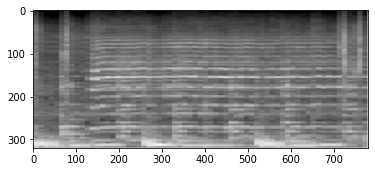

In [ ]:
plt.imshow(resize_img, cmap='gray')
print(resize_img)

In [ ]:
input_img = resize_img.astype('float32')
input_img = input_img/255.0
print(input_img)
input_img = input_img.reshape(-1,img_w,img_h,1)

[[1.         0.9882353  0.9882353  ... 0.9882353  0.9882353  1.        ]
 [1.         0.17254902 0.17254902 ... 0.03529412 0.03529412 0.99607843]
 [0.99607843 0.16078432 0.16078432 ... 0.07450981 0.07450981 0.99607843]
 ...
 [1.         0.8        0.8        ... 0.5921569  0.5921569  1.        ]
 [1.         0.61960787 0.61960787 ... 0.56078434 0.56078434 1.        ]
 [1.         0.99607843 0.99607843 ... 0.99607843 0.99607843 1.        ]]


In [ ]:
print(input_img.shape)
print(input_img)

In [ ]:
# # pred1 = pred_model1.predict(input_img)
# pred2 = pred_model2.predict(input_img)
# # y1 = np.argmax(pred1)
# y2 = np.argmax(pred2)
# # pred_word1 = output_classes[y1]
# pred_word2 = output_classes[y2]

In [ ]:
pred = model.predict(input_img)
y = np.argmax(pred)
word = output_classes[y]
print(word)

reggae


In [ ]:
print(pred_word2)

reggae


In [ ]:
output_classes

array(['blues', 'classical', 'metal', 'reggae', 'rock'], dtype=object)